In [1]:
#Importing different liabraries for the Uber data analysis

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import calendar

In [2]:
#Opening the dataset

data = pd.read_csv('Uber Drives.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
#Checking the missing values in the dataset

data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [4]:
#Drop the missing values

data = data.dropna()

In [5]:
#Recheck if any null values remained in the dataset post fillna

data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

### It seems that all the null values have been dropped after fillna

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [7]:
#Changing the dataset of the Start date and end date

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'],format= "%m/%d/%Y  %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'],format= "%m/%d/%Y  %H:%M")

In [8]:
#Rechecking the format of all the items
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  653 non-null    datetime64[ns]
 1   END_DATE*    653 non-null    datetime64[ns]
 2   CATEGORY*    653 non-null    object        
 3   START*       653 non-null    object        
 4   STOP*        653 non-null    object        
 5   MILES*       653 non-null    float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 40.8+ KB


# We need to segregate the date into Date, month, weekdays and weekends

In [9]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [10]:
#Checking the data format post formatting

data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [11]:
#Checking the categories for which the uber cab got booked

data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

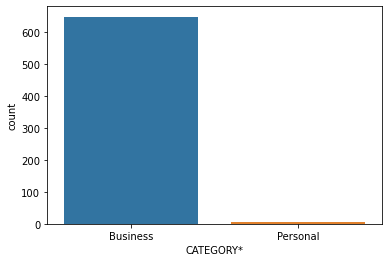

In [12]:
sns.countplot(x='CATEGORY*', data=data)

# How long do people travel through uber?

<AxesSubplot:ylabel='Frequency'>

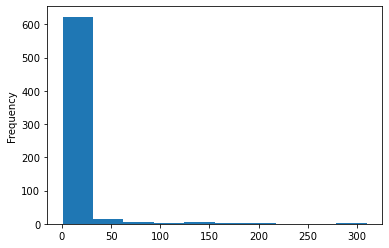

In [13]:
data['MILES*'].plot.hist()

### What hour do most people take uber for most of their destination?

Text(0.5, 1.0, 'Number of Trips vs hours')

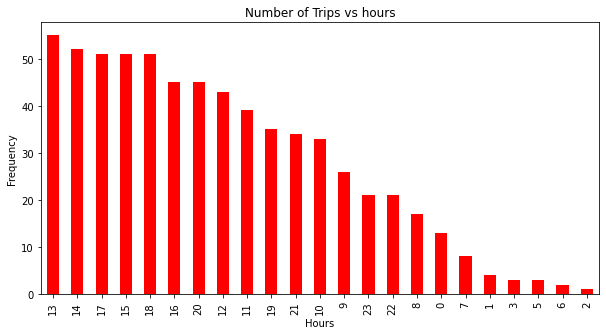

In [14]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color = 'red', figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs hours')

# Observations:
1.  Most people like booking Uber in between 1PM to 8pm
2.  Very less uber booking have been observed in between 1am till 6am

# Check the purpose of the trips

Text(0.5, 1.0, 'Purpose of Trips')

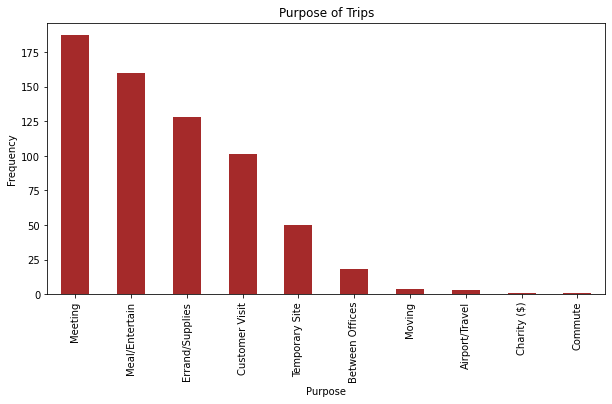

In [15]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(10,5), color='Brown')

plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose of Trips')

# Purpose of Trips
1.  Most people often book an uber for Meetings, meal, Errand/supplies etc.
2.  Very less people prefer booking an uber cab for commuting or moving at regular intervals. Instead they might opt for the public transport than uber for which cost effective most of the times.

# Which day has the highest number of trips?

<AxesSubplot:>

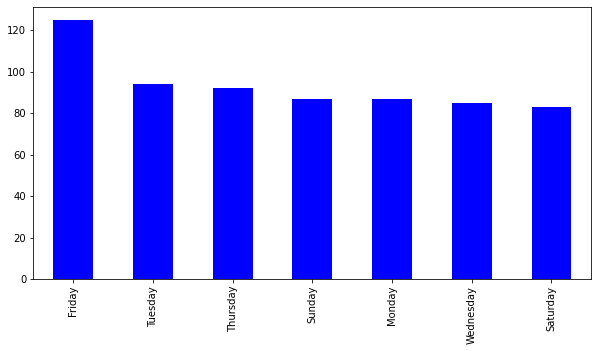

In [16]:
data['WEEKDAY'].value_counts().plot(kind='bar', color='Blue', figsize=(10,5))




### Mostly people choose to book Uber mostly on Friday than any other day in a week.

# What are the number of trips per each day?

<AxesSubplot:>

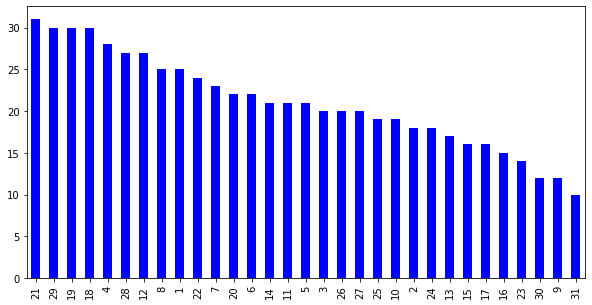

In [17]:
data['DAY'].value_counts().plot(kind='bar', color='Blue', figsize=(10,5))

# What are the different trips in a month

<AxesSubplot:>

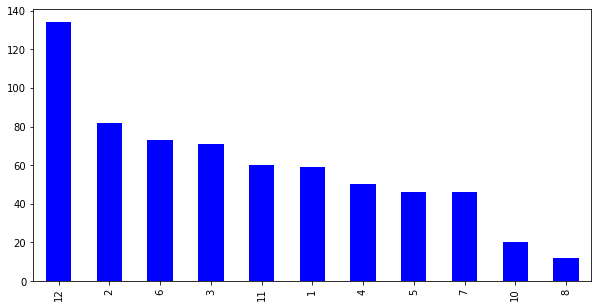

In [18]:
data['MONTH'].value_counts().plot(kind='bar', color='Blue', figsize=(10,5))


# December is the month in which most of the uber cabs gets booked.  As it is festival time and each one of under vacation mode.

### Starting point of the trip where people have started their ride from the most

<AxesSubplot:>

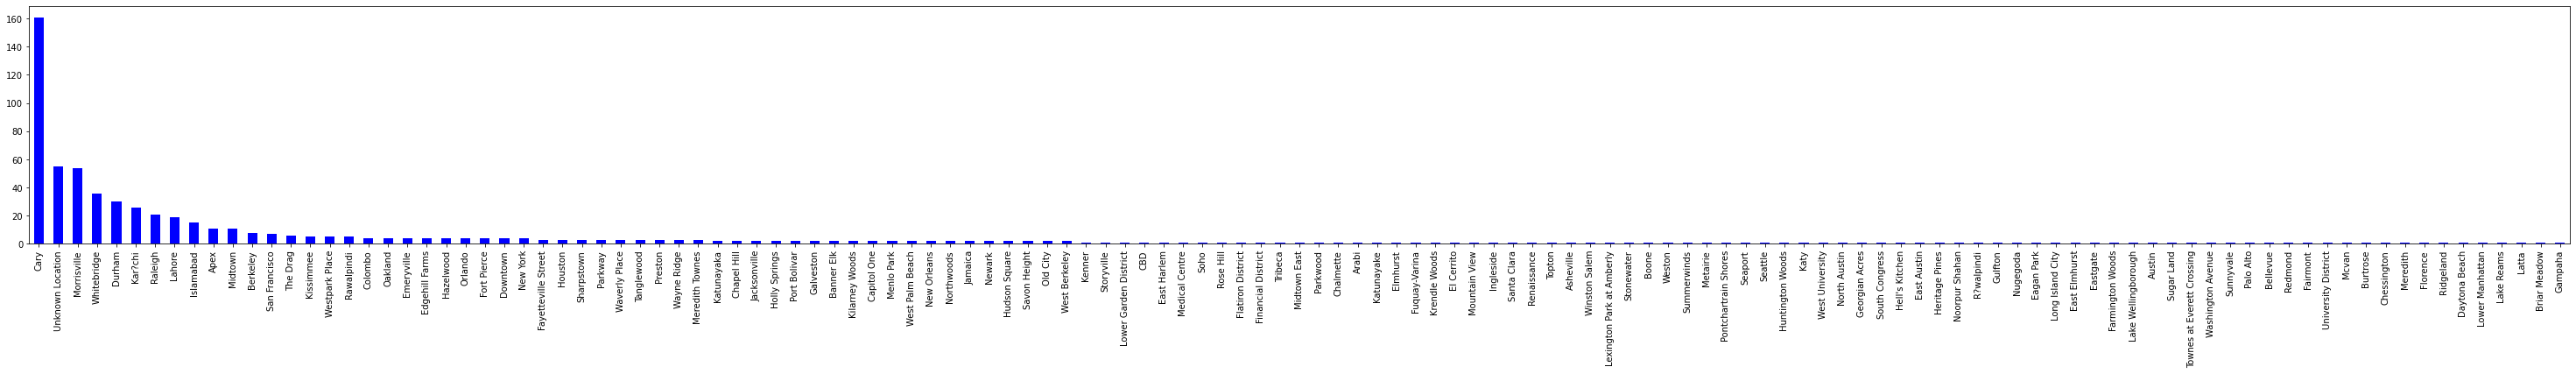

In [19]:
data['START*'].value_counts().plot(kind='bar', color='Blue', figsize=(52,5))

# Cary is the location from where people mostly chosen as starting point of the trip